## Histograms

**This notebook was created to create graphs with various statistics**

# 0. Library imports and parameter(s) declaration.

In [50]:
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans

import zat
from zat.log_to_dataframe import LogToDataFrame
from zat.dataframe_to_matrix import DataFrameToMatrix

random_state = 42 # set in order to guarantee repetability of results
# This variable will be used in all the procedure calls allowing a random_state parameter
# in this way the running can be perfectly reproduced, just change this value for a different experiment
log_file = 'fullLog.log'

sep1 = '\x09' # separator for the dataset's csv file (not necessary)

# 1. Load the dataset and explore the data, showing size, structure and histograms.

Loading the dataset, showing the size and the first rows.

In [51]:
# Create a Pandas dataframe from a Zeek log file
log_to_df = LogToDataFrame()
df = log_to_df.create_dataframe(log_file)

print("The dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

The dataset contains 113831 rows and 38 columns


In [52]:
# Print out the head of the dataframe
print(df.head())

                                    uid    id.orig_h  id.orig_p    id.resp_h  \
ts                                                                             
2023-01-25 15:17:31    CfuNS6Korff7PC11  185.175.0.3      58040  185.175.0.5   
2023-01-25 15:17:31  CgZjBk3xfJk84Ote4j  185.175.0.3      58042  185.175.0.5   
2023-01-25 15:17:31  CNxdJq1kJRNl1o5BD5  185.175.0.3      58044  185.175.0.5   
2023-01-25 15:17:31  C6F0Jn2hAo1NeUWZhg  185.175.0.3      58046  185.175.0.5   
2023-01-25 15:17:36   CSdnUU3o6SEwunvLL  185.175.0.3      58048  185.175.0.5   

                     id.resp_p proto service duration  orig_bytes  resp_bytes  \
ts                                                                              
2023-01-25 15:17:31        502   tcp  modbus     0m0s           0          11   
2023-01-25 15:17:31        502   tcp  modbus     0m0s          12          10   
2023-01-25 15:17:31        502   tcp  modbus     0m0s          12          10   
2023-01-25 15:17:31        502   t

Description of the main characteristics of the dataframe.

In [53]:
df.describe()

,id.orig_p,id.resp_p,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,sload,...,dmeansz,trans_depth,reb_bdy_len,is_ftp_login,ct_ftp_cmd,pkts_dropped_,sjit,djit,sinpkt,dinpkt
count,113831.0,113831.0,113769.0,113769.0,113831.0,113831.0,113831.0,113831.0,113831.0,113769.000000,...,113769.000000,113831.0,113831.0,0.0,0.0,113831.0,107224,107676,107224,107676
mean,45926.096099,504.956198,20.927335,10.569742,0.004779,5.752159,321.497843,4.452276,249.651562,26655.406926,...,1.902970,0.0,0.0,<NA>,<NA>,0.0,0 days 00:00:00.000248608,0 days 00:00:00,0 days 00:00:00.007873397,0 days 00:00:00.005354865
std,8030.381085,113.202342,751.760665,56.495557,1.140123,6.030777,1061.427466,3.135495,218.354197,40609.153321,...,0.557406,0.0,0.0,<NA>,<NA>,0.0,0 days 00:00:00.052574557,0 days 00:00:00,0 days 00:00:00.044002726,0 days 00:00:00.044107322
min,5353.0,502.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,<NA>,<NA>,0.0,-1 days +23:59:58.455415,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
25%,39154.0,502.0,12.0,10.0,0.0,6.0,320.0,4.0,226.0,0.495668,...,2.000000,0.0,0.0,<NA>,<NA>,0.0,-1 days +23:59:59.999376,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
50%,45490.0,502.0,12.0,10.0,0.0,6.0,320.0,5.0,278.0,1.448740,...,2.000000,0.0,0.0,<NA>,<NA>,0.0,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
75%,52154.0,502.0,12.0,11.0,0.0,6.0,332.0,5.0,278.0,67367.104568,...,2.000000,0.0,0.0,<NA>,<NA>,0.0,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00.003502,0 days 00:00:00.000250
max,60998.0,5353.0,144957.0,10906.0,272.0,1151.0,204817.0,580.0,41074.0,545600.520325,...,18.000000,0.0,0.0,<NA>,<NA>,0.0,0 days 00:00:12.922359,0 days 00:00:00,0 days 00:00:09.439450,0 days 00:00:11.454150


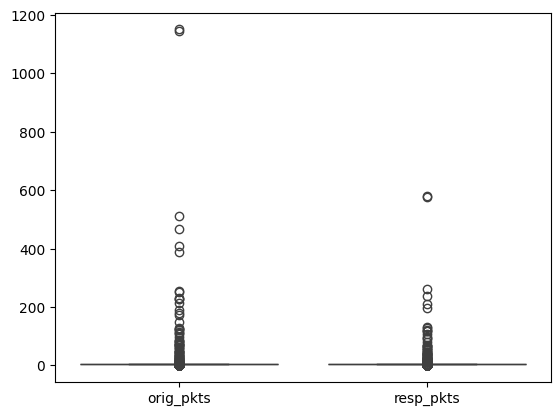

In [54]:
sns.boxplot(data=df[['orig_pkts', 'resp_pkts']])
plt.show()

Histograms of numeric data:

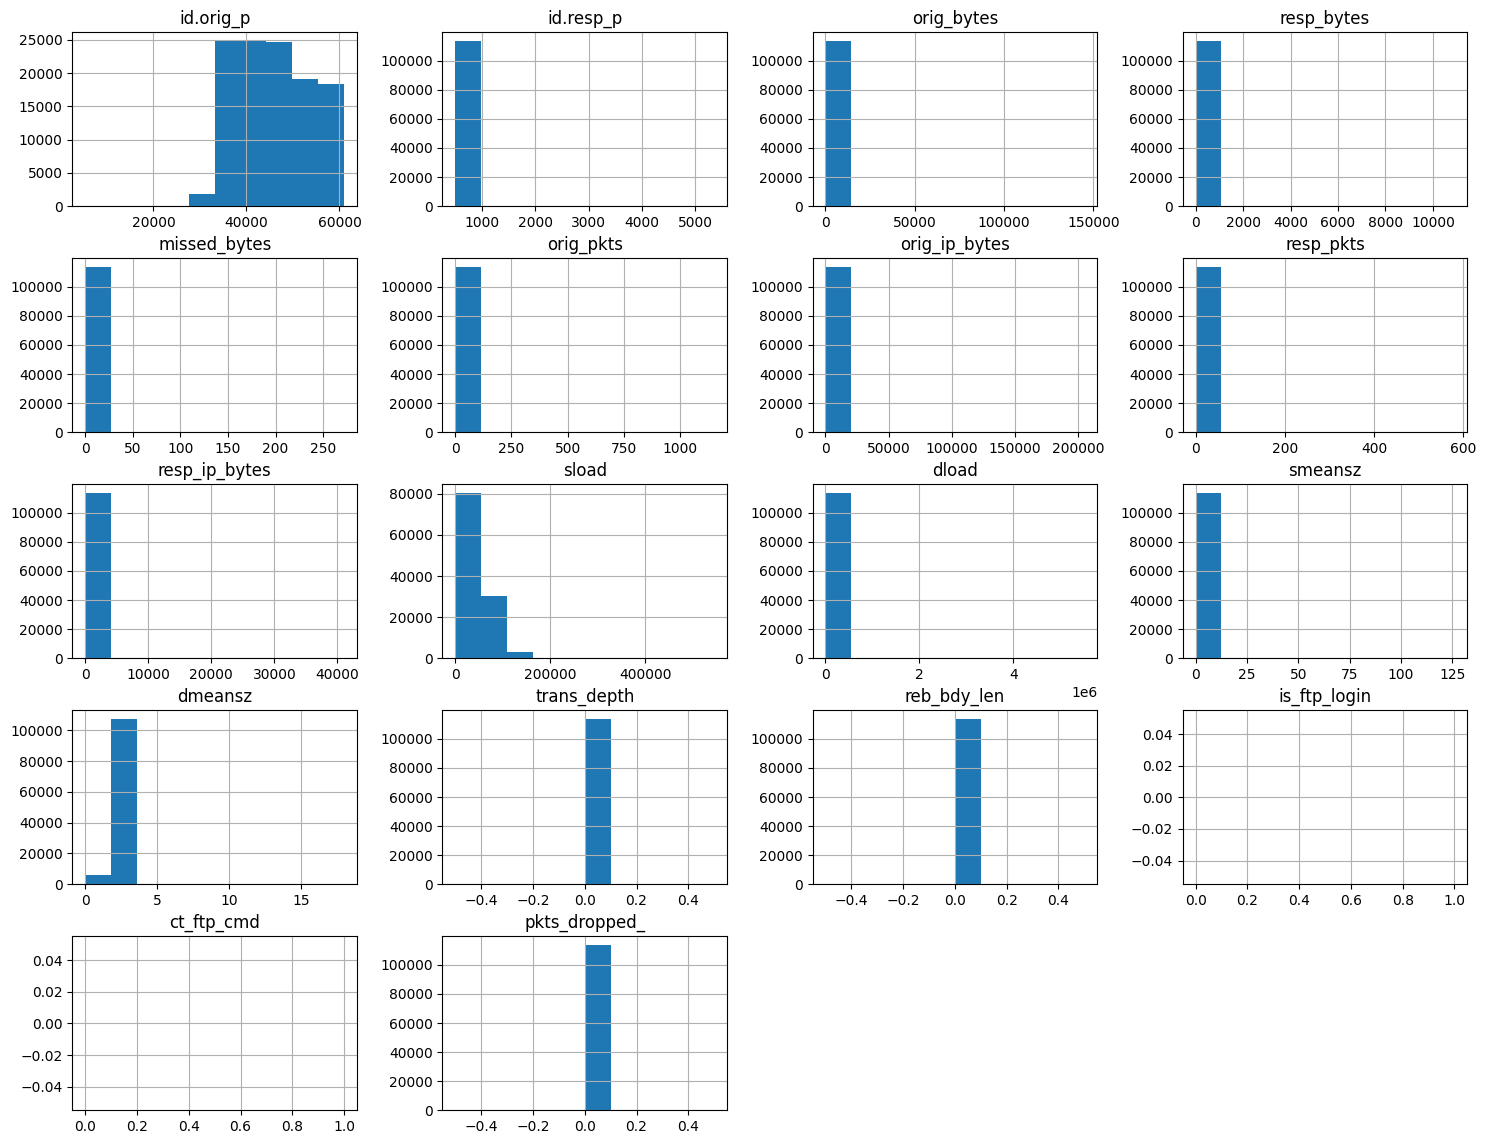

In [55]:
pd.DataFrame.hist(df, figsize=[18, 14])
plt.show()

In [56]:
proto = df['proto']
k = len(proto.unique())
print(k)

2


In [57]:
print(df.columns)

Index(['uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto',
       'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state',
       'local_orig', 'local_resp', 'missed_bytes', 'history', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'tunnel_parents',
       'sload', 'dload', 'smeansz', 'dmeansz', 'trans_depth', 'reb_bdy_len',
       'start_time', 'last_time', 'is_sm_ips_ports', 'is_ftp_login',
       'user_ftp', 'pwd_ftp', 'ct_ftp_cmd', 'pkts_dropped_', 'sjit', 'djit',
       'sinpkt', 'dinpkt'],
      dtype='object')
